In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

In [9]:
#By printing a dataframe, you can view the data in csv format
print(df1)
print(df1['y'][0])

           x1        x2    y
0    4.786214  4.650073  1.0
1    3.170196  4.005515  1.0
2    5.000920  4.897350  1.0
3    4.522969  6.215182  0.0
4    3.599857  5.564085  0.0
..        ...       ...  ...
195  3.450067  4.522179  1.0
196  4.621823  6.202977  1.0
197  3.633474  3.684436  1.0
198  3.729999  5.425063  1.0
199  5.104393  6.337585  1.0

[200 rows x 3 columns]
1.0


In [10]:
#You can extract keys from dataframe, which you can use to extract features or labels.
#print(df1.keys())
df1_x1 = df1['x1']
df1_x2 = df1['x2']
#To extract data as numpy array:
df1_numpy = df1.values
#You can also extract a specific feature as numpy array as well.
df1_x1_numpy = df1['x1'].values
df1_x2_numpy = df1['x2'].values
df2_x1_numpy = df2['x1'].values
df2_x2_numpy = df2['x2'].values

#Generating numpy arrays 
df1_x1_class0 = np.array([])
df1_x2_class0 = np.array([])
df1_x1_class1 = np.array([])
df1_x2_class1 = np.array([])

df2_x1_class0 = np.array([])
df2_x2_class0 = np.array([])
df2_x1_class1 = np.array([])
df2_x2_class1 = np.array([])



#Arrays are seperated according to their classes
for i in range(0,200):
    if(df1['y'][i] == 0):
        df1_x1_class0 = np.append(df1_x1_class0,df1['x1'][i])
        df1_x2_class0 = np.append(df1_x2_class0, df1['x2'][i])
    else:
        df1_x1_class1 = np.append(df1_x1_class1,df1['x1'][i])
        df1_x2_class1 = np.append(df1_x2_class1,df1['x2'][i])
        
for i in range(0,1600):
    if(df2['y'][i] == 0):
        df2_x1_class0 = np.append(df2_x1_class0,df2['x1'][i])
        df2_x2_class0 = np.append(df2_x2_class0, df2['x2'][i])
    else:
        df2_x1_class1 = np.append(df2_x1_class1,df2['x1'][i])
        df2_x2_class1 = np.append(df2_x2_class1,df2['x2'][i])
        
        



## Part A: Examine training sets

<ipython-input-11-df415d347186>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-11-df415d347186>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)
<ipython-input-11-df415d347186>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  bx.set_xticklabels(['']+alpha)
<ipython-input-11-df415d347186>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  bx.set_yticklabels(['']+alpha)
<ipython-input-11-df415d347186>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  cx.set_xticklabels(['']+alpha)
<ipython-input-11-df415d347186>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  cx.set_yticklabels(['']+alpha)
<ipython-input-11-df415d347186>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  dx.set_xticklabels(['']

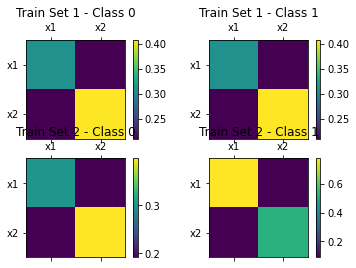

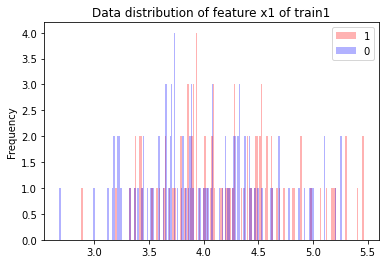

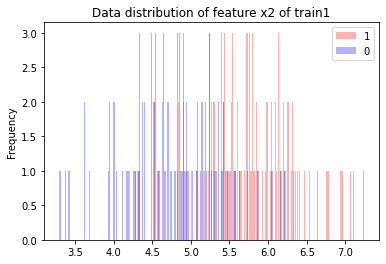

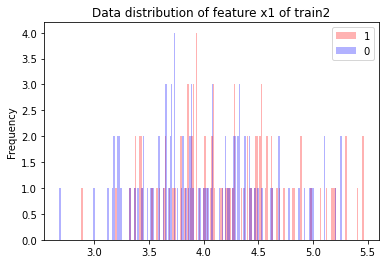

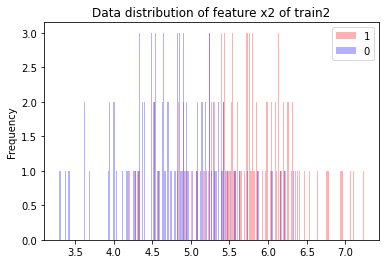

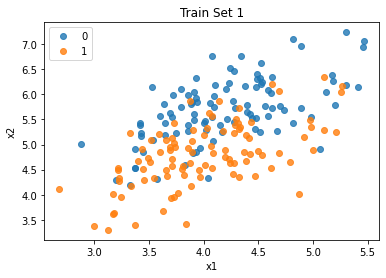

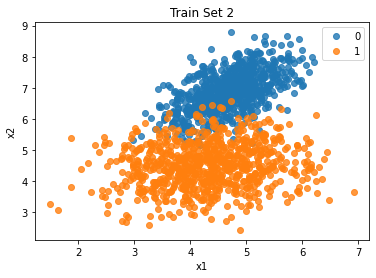

In [11]:
##################################################################################

#Numpy has ready-to-use method to extract covariance matrix out of given dataset.

cov_mtrx_set1class0 = np.cov(df1_x1_class0,df1_x2_class0) 
cov_mtrx_set1class1 = np.cov(df1_x1_class1,df1_x2_class1)
cov_mtrx_set2class0 = np.cov(df2_x1_class0,df2_x2_class0)
cov_mtrx_set2class1 = np.cov(df2_x1_class1,df2_x2_class1)


##################################################################################
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
cax = ax.matshow(cov_mtrx_set1class0,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax.set_title("Train Set 1 - Class 0")


bx = fig.add_subplot(2,2,2)
cbx = bx.matshow(cov_mtrx_set1class1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cbx)
bx.set_xticklabels(['']+alpha)
bx.set_yticklabels(['']+alpha)
bx.set_title("Train Set 1 - Class 1")

cx = fig.add_subplot(2,2,3)
ccx = cx.matshow(cov_mtrx_set2class0,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(ccx)
cx.set_xticklabels(['']+alpha)
cx.set_yticklabels(['']+alpha)
cx.set_title("Train Set 2 - Class 0")

dx = fig.add_subplot(2,2,4)
cdx = dx.matshow(cov_mtrx_set2class1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cdx)
dx.set_xticklabels(['']+alpha)
dx.set_yticklabels(['']+alpha)
dx.set_title("Train Set 2 - Class 1")
####################################################################################
#Plotting hisragrams
color = ['r', 'b']
df1_c0 = df1.loc[df1["y"] == 0]
df1_c1 = df1.loc[df1["y"] == 1]
df2_c0 = df2.loc[df2["y"] == 0]
df2_c1 = df2.loc[df2["y"] == 1]



##X1 , SET1
hist_x1_set1 = plt.figure()
plt.gca().set(title='Data distribution of feature x1 of train1', ylabel='Frequency')


plt.hist(df1_c0["x1"],bins = 200, color = 'r' , alpha = 0.3, label = 1)
plt.hist(df1_c1["x1"],bins = 200, color = 'b' , alpha = 0.3, label = 0)
plt.legend()

##X2 , SET1
hist_x2_set1 = plt.figure()
plt.gca().set(title='Data distribution of feature x2 of train1', ylabel='Frequency')
plt.hist(df1_c0["x2"],bins = 200, color = 'r' , alpha = 0.3, label = 1)
plt.hist(df1_c1["x2"],bins = 200, color = 'b' , alpha = 0.3, label = 0)
plt.legend()

##X1 , SET2
hist_x1_set2 = plt.figure()
plt.gca().set(title='Data distribution of feature x1 of train2', ylabel='Frequency')
plt.hist(df1_c0["x1"],bins = 200, color = 'r' , alpha = 0.3, label = 1)
plt.hist(df1_c1["x1"],bins = 200, color = 'b' , alpha = 0.3, label = 0)
plt.legend()

##X2 , SET2
hist_x2_set2 = plt.figure()
plt.gca().set(title='Data distribution of feature x2 of train2', ylabel='Frequency')
plt.hist(df1_c0["x2"],bins = 200, color = 'r' , alpha = 0.3, label = 1)
plt.hist(df1_c1["x2"],bins = 200, color = 'b' , alpha = 0.3, label = 0)
plt.legend()

####################################################################################
#Plotting scatters

##Dataset1
fig_scatter_set1 = plt.figure()
plt.gca().set(title='Train Set 1', ylabel='x2', xlabel = 'x1')
plt.plot(df1_c0["x1"],df1_c0["x2"], marker = 'o', linestyle = '', label = 0, alpha = 0.8 )
plt.plot(df1_c1["x1"],df1_c1["x2"], marker = 'o', linestyle = '', label = 1, alpha = 0.8 )
plt.legend()

##Dataset2
fig_scatter_set2 = plt.figure()
plt.gca().set(title='Train Set 2', ylabel='x2', xlabel = 'x1')
plt.plot(df2_c0["x1"],df2_c0["x2"], marker = 'o', linestyle = '', label = 0, alpha = 0.8 )
plt.plot(df2_c1["x1"],df2_c1["x2"], marker = 'o', linestyle = '', label = 1, alpha = 0.8 )
plt.legend()


##################################################################################
#for the histogram plots use plt.hist() (Remember: 4 of them we want)
#for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')

In [13]:
df_test1 = pd.read_csv("test1.csv")
df_test2 = pd.read_csv("test2.csv")
###############################
print("Mean Vector of Dataset 1 - Class 0: ")
print(np.array(df1_c0.mean()[0:2]).reshape(2,1))
print("Mean Vector of Dataset 1 - Class 1: ")
print(np.array(df1_c1.mean()[0:2]).reshape(2,1))
print("Mean Vector of Dataset 2 - Class 0: ")
print(np.array(df2_c0.mean()[0:2]).reshape(2,1))
print("Mean Vector of Dataset 2 - Class 1: ")
print(np.array(df2_c1.mean()[0:2]).reshape(2,1))

print(" ")

print("Covariance Matrix of Dataset 1 - Class 0 :")
print(cov_mtrx_set1class0)
print("Covariance Matrix of Dataset 1 - Class 1 :")
print(cov_mtrx_set1class1)
print("Covariance Matrix of Dataset 0 - Class 0 :")
print(cov_mtrx_set2class0)
print("Covariance Matrix of Dataset 0 - Class 0 :")
print(cov_mtrx_set2class1)



def bayestraining(df_train,df_test):
    df_c0 = df_train.loc[df_train["y"] == 0] #Class 0 samples
    df_c1 = df_train.loc[df_train["y"] == 1] #Class 1 samples
    
    cov_mtrx_class0 = np.cov(df_c0['x1'].values, df_c0['x2'].values) # Covariance matrix for class 0
    cov_mtrx_class1 = np.cov(df_c1['x1'].values, df_c1['x2'].values) # Covariance matrix for class 1
    print("COV C0",cov_mtrx_class0)
    print("COV C1",cov_mtrx_class0)
    mean_vec_c0 = np.array(df_c0.mean()[0:2]).reshape(2,1) # Mean vector for class 0
    mean_vec_c1 = np.array(df_c0.mean()[0:2]).reshape(2,1) # Mean vector for class 1
    
    #Preparing test samples for testing
    df_test_np = df_test.values 
    
    class_predicted = [] # Array for predicted values
    correct = 0          # Int for correct predictions
    fail = 0             # Int for failed predictions
    if(np.allclose(cov_mtrx_class0,cov_mtrx_class1)):   #If covariance matrices are equal 
        print("Covariance Matrices are the same ")
        for x1,x2,y in df_test_np:
            x = np.array([[x1],[x2]])
            #discriminant function for class 0 
            g_0 = (-0.5) * np.matmul(np.matmul( np.transpose(x - mean_vec_c0), np.linalg.inv(cov_mtrx_class0)), x - mean_vec_c0) - (0.5) * np.log(np.linalg.det(cov_mtrx_class0))
            g_1 = (-0.5) * np.matmul(np.matmul( np.transpose(x - mean_vec_c1), np.linalg.inv(cov_mtrx_class1)), x - mean_vec_c1) - (0.5) * np.log(np.linalg.det(cov_mtrx_class1))
            if(g_0 > g_1):
                class_predicted.append(0)             
            else:
                class_predicted.append(1)
            
        class_predicted = np.array(class_predicted).reshape(len(class_predicted),1)
    
    else: 
        print("General Case")
        for x1,x2,y in df_test_np:
            x = np.array([[x1],[x2]])
            #discriminant function for class 0 
            g_0 = (-0.5) * np.matmul(np.matmul( np.transpose(x - mean_vec_c0), np.linalg.inv(cov_mtrx_class0)), x - mean_vec_c0) - (0.5) * np.log(np.linalg.det(cov_mtrx_class0))
            g_1 = (-0.5) * np.matmul(np.matmul( np.transpose(x - mean_vec_c1), np.linalg.inv(cov_mtrx_class1)), x - mean_vec_c1) - (0.5) * np.log(np.linalg.det(cov_mtrx_class1))
            if(g_0 > g_1):
                class_predicted.append(0)             
            else:
                class_predicted.append(1)
            
    class_predicted = np.array(class_predicted).reshape(len(class_predicted),1)
    
    for i in range(0,len(class_predicted)):
        if(class_predicted[i] == df_test['y'].values[i]):
            correct = correct + 1
        else:
            fail = fail + 1
    
    errorpercent = fail / (correct + fail) * 100
    print("Error: ", errorpercent ,"%" )
    return errorpercent
        
    

            
bayestraining(df1,df_test1)
bayestraining(df2,df_test2)
            

Mean Vector of Dataset 1 - Class 0: 
[[4.2]
 [5.7]]
Mean Vector of Dataset 1 - Class 1: 
[[4. ]
 [4.8]]
Mean Vector of Dataset 2 - Class 0: 
[[4.69156024]
 [6.8893364 ]]
Mean Vector of Dataset 2 - Class 1: 
[[4.29725029]
 [4.50444121]]
 
Covariance Matrix of Dataset 1 - Class 0 :
[[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
Covariance Matrix of Dataset 1 - Class 1 :
[[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
Covariance Matrix of Dataset 0 - Class 0 :
[[0.29951128 0.19207738]
 [0.19207738 0.39774578]]
Covariance Matrix of Dataset 0 - Class 0 :
[[0.77538057 0.0893196 ]
 [0.0893196  0.52802646]]
COV C0 [[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
COV C1 [[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
Covariance Matrices are the same 
Error:  46.0 %
COV C0 [[0.29951128 0.19207738]
 [0.19207738 0.39774578]]
COV C1 [[0.29951128 0.19207738]
 [0.19207738 0.39774578]]
General Case
Error:  14.499999999999998 %


14.499999999999998

## PART C

In [16]:

#Merging test and train sets

df1_comb = pd.concat([df1, df_test1])
df2_comb = pd.concat([df2, df_test2])


#Applying K-Fold for dataset1

kf = KFold(n_splits = 3)
kf.get_n_splits(df1_comb)
a = kf.split(df1_comb)

errors_df1 = []
errors_df2 = []

print("Dataset 1: ")

for train_index, test_index in a: #Indexes 
    
    #Extracting testing samples
    test_df = df1_comb.iloc[test_index[0]:test_index[99]+1, :]  
    
    #Extracting training samples
    dftemp = df1_comb.iloc[train_index[0]:test_index[0], :]
    dftemp2 = df1_comb.iloc[test_index[99]+1: , :] 
    train_df = dftemp.append(dftemp2)
    errors_df1.append(bayestraining(train_df,test_df))


e_df1 = 0
    
for it in errors_df1:
    e_df1 += it

avgerror_df1 = e_df1 / len(errors_df1)
print("Average error: ", avgerror_df1)



#Applying KFold for dataset2

print("\n \nDataset 2: ")

kf2 = KFold(n_splits = 3)
kf2.get_n_splits(df2_comb)

for train_index, test_index in kf.split(df2_comb):

    #Extracting testing samples
    test_df2 = df2_comb.iloc[test_index[0]:test_index[99]+1, :  ]
    
    #Extracting training samples
    dftempp = df2_comb.iloc[test_index[0]: test_index[len(test_index)-1]+1, :]
    dftempp2 = df2_comb.iloc[test_index[len(test_index)-1]+1 : , :]
    train_df2 = dftempp.append(dftempp2)
    errors_df2.append(bayestraining(train_df2,test_df2))
    
    
e_df2 = 0

for it in errors_df2:
    e_df2 += it
    
avgerror_df2 = e_df2 / len(errors_df2)
print("Average error:", avgerror_df2)


    

Dataset 1: 
COV C0 [[0.311503   0.23189425]
 [0.23189425 0.41604462]]
COV C1 [[0.311503   0.23189425]
 [0.23189425 0.41604462]]
General Case
Error:  43.0 %
COV C0 [[0.27009409 0.19845914]
 [0.19845914 0.39309947]]
COV C1 [[0.27009409 0.19845914]
 [0.19845914 0.39309947]]
General Case
Error:  50.0 %
COV C0 [[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
COV C1 [[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
Covariance Matrices are the same 
Error:  46.0 %
Average error:  46.333333333333336

 
Dataset 2: 
COV C0 [[0.30195491 0.1879452 ]
 [0.1879452  0.40017123]]
COV C1 [[0.30195491 0.1879452 ]
 [0.1879452  0.40017123]]
General Case
Error:  11.0 %
COV C0 [[0.30583749 0.19512073]
 [0.19512073 0.40138576]]
COV C1 [[0.30583749 0.19512073]
 [0.19512073 0.40138576]]
General Case
Error:  15.0 %
COV C0 [[0.31139503 0.18613034]
 [0.18613034 0.40230628]]
COV C1 [[0.31139503 0.18613034]
 [0.18613034 0.40230628]]
General Case
Error:  12.0 %
Average error: 12.666666666666666


Error were reduced by applying K-Fold

Feature values of new samples added to dataset 2 are not satisfying their class standarts.
Samples are overlapping more.

Training and testing result for Modified Set:
COV C0 [[0.31223196 0.22762667]
 [0.22762667 0.55373698]]
COV C1 [[0.31223196 0.22762667]
 [0.22762667 0.55373698]]
General Case
Error:  17.5 %


17.5

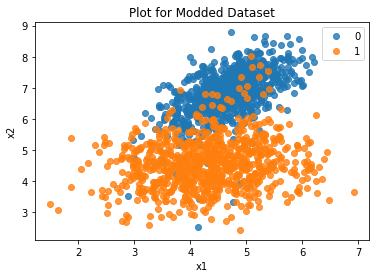

In [15]:
df_mod =pd.read_csv("train2_modified.csv")
df_mod_c0 = df_mod.loc[df_mod["y"] == 0]
df_mod_c1 = df_mod.loc[df_mod["y"] == 1]

fig_modset = plt.figure()
plt.gca().set(title='Plot for Modded Dataset', ylabel='x2', xlabel = 'x1')
plt.plot(df_mod_c0["x1"],df_mod_c0["x2"], marker = 'o', linestyle = '', label = 0, alpha = 0.8 )
plt.plot(df_mod_c1["x1"],df_mod_c1["x2"], marker = 'o', linestyle = '', label = 1, alpha = 0.8 )
plt.legend()

print("Feature values of new samples added to dataset 2 are not satisfying their class standarts.\nSamples are overlapping more.")

print("\nTraining and testing result for Modified Set:")
bayestraining(df_mod, df_test2)






















Error was 15% for unmodified train set 2. Because of outlying samples, Error rate has slightly increased.





Bayes classifier is a cool invention